# Example plots using IDEAL Home Energy Dataset metadata and survey data

### About
* Authors: Martin Pullinger, Jonathan Kilgour, University of Edinburgh, School of Informatics.
* Date: May 2020

### Purpose
This script provides simple code examples to demonstrate how to:
* 1) access and use metadata and survey response data from the IDEAL Home Energy Dataset
* 2) make use of the file 'survey_response_wordings.csv' to aid data analysis.

### Inputs
Source data and supporting files come from the following tables from the IDEAL Home Energy Dataset (store them in a sub-directory called 'Data'):
* home.csv
* person.csv
* survey_responses.csv
* survey_response_wordings.csv

Note this is tested with Python 3.x.

### Outputs
* Plots of data as demonstrated in 2) below.

---
## 0) Setup

In [2]:
import sys
sys.path.append('/Users/barry/CodeAcademy/Ideal_dataset/coding/API')

In [3]:
import os
cwd = os.getcwd()
import datetime
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from IdealMetadataInterface import IdealMetadataInterface

## 1) Import data

Set your paths as appropriate

In [4]:
metadatapath = '/Users/barry/CodeAcademy/Ideal_dataset/metadata_and_surveys/metadata'
surveypath = '/Users/barry/CodeAcademy/Ideal_dataset/metadata_and_surveys/surveys'

mdi = IdealMetadataInterface(metadatapath)
survey_responses = pd.read_csv(os.path.join(surveypath,'survey_responses.csv'))
survey_response_wordings = pd.read_csv(os.path.join(surveypath,'survey_response_wordings.csv'))

---
## 2) Example data plots
### Occupancy counts
This uses data from home.csv

In [11]:
home = mdi.metadata.homes['home']


In [12]:
person = mdi.metadata.people['person']
person

,personid,homeid,primaryparticipant,relationtoprimary,gender,ageband,workingstatus,weeklyhoursofwork,education,ageleavingeducation,signedup,startdate,highest_earner
0,617,47,1,NaN,Female,25-29,Paid work,31-40,"Degree level qualification (or equivalent), e....",23.0,1,2016-08-16,0
1,618,47,0,"Husband, wife or partner",Male,20-24,Paid work,41-50,"Degree level qualification (or equivalent), e....",NaN,0,2016-08-16,0
2,621,59,1,NaN,Male,30-34,Paid work,31-40,"Degree level qualification (or equivalent), e....",21.0,1,2016-10-06,1
3,622,59,0,"Husband, wife or partner",Female,30-34,Paid work,41-50,"Degree level qualification (or equivalent), e....",22.0,0,2016-10-06,0
4,1047,59,0,"Son or daughter, inc. adopted, step, foster an...",NaN,0-4,NaN,NaN,NaN,NaN,0,2017-09-22,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
611,1333,334,0,"Son or daughter, inc. adopted, step, foster an...",Female,10-14,A student at school or in further education,NaN,No formal qualifications,96.0,0,2018-04-30,0
612,1334,334,0,"Son or daughter, inc. adopted, step, foster an...",Male,10-14,A student at school or in further education,NaN,No formal qualifications,96.0,0,2018-04-30,0
613,1335,334,0,"Son or daughter, inc. adopted, step, foster an...",Female,5-9,A student at school or in further education,NaN,No formal qualifications,96.0,0,2018-04-30,0
614,1336,335,1,NaN,Male,30-34,Paid work,41-50,"Degree level qualification (or equivalent), e....",23.0,0,2018-04-30,1


In [13]:
# Relabel homes with missing occupants
home = mdi.metadata.homes['home']
person = mdi.metadata.people['person']

home_plots = home.copy()
home_plots.residents = home_plots.residents.astype(str)
home_plots.residents.replace('0','No data', regex=True, inplace=True)

/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_80429/711675830.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  home_plots.residents.replace('0','No data', regex=True, inplace=True)


In [14]:
# Sort the data for plotting
home_plots.sort_values(by='residents', ascending=True, inplace=True)

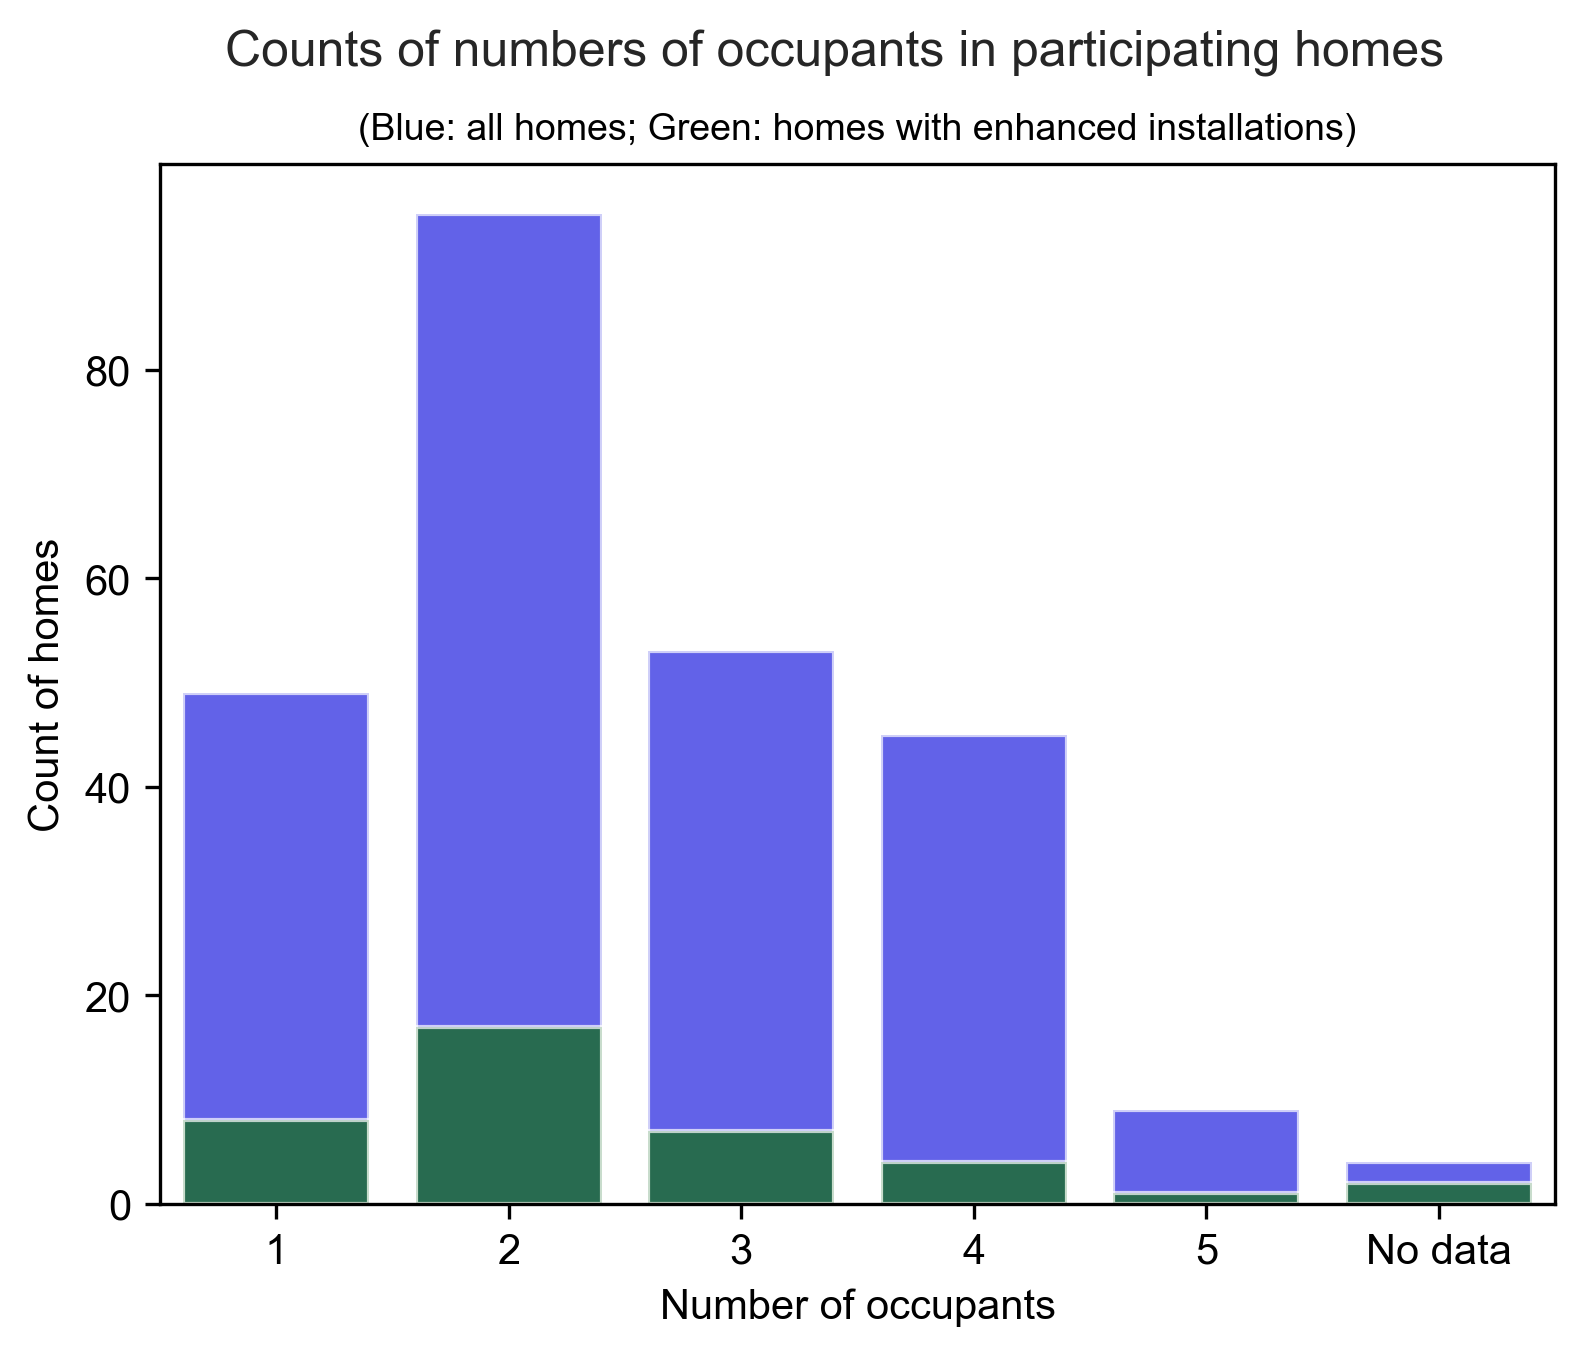

In [15]:
# Plot the data
fig = plt.figure(figsize = (6,4.5),dpi=300) 
ax = fig.add_subplot(111) 
sns.set_style('whitegrid') 
ax = sns.countplot(x="residents", data=home_plots, color='blue',alpha=0.7)
ax = sns.countplot(x="residents", data=home_plots[home_plots.install_type=="enhanced"], color='green',alpha=0.7)
ax.set(ylabel="Count of homes", xlabel="Number of occupants")
fig.suptitle("Counts of numbers of occupants in participating homes", fontsize=12)
ax.set_title("(Blue: all homes; Green: homes with enhanced installations)", fontsize=9)
plt.show()

### Age bands of primary participants
This uses:
* data from person.csv and home.csv
* survey_response_wordings.csv to order the age bands correctly

In [16]:
# Add in the install_type to person table
person = pd.merge(person,home[["homeid","install_type"]],on="homeid",how="left")

In [17]:
# Sort data by ageband
# Use survey_response_wordings to set the correct order for ageband responses
agedband_order = survey_response_wordings[survey_response_wordings.uniquequestionid=='ageband'].response_wording.tolist()
agedband_order.append('No data')

# Convert any missing data to 'No data'
person.loc[person.ageband.isnull(),"ageband"]="No data"
# Convert to a categorical using the ageband order
person['ageband'] = pd.Categorical(person['ageband'], agedband_order)
person.sort_values(by='ageband', ascending=True,inplace=True)

In [18]:
# Precalculate the summary data for the plot
# For all homes
groupby_object_all = person[person.primaryparticipant==1].groupby(['ageband'])
ageband_summary_all = groupby_object_all[['primaryparticipant']].count()
ageband_summary_all.rename(columns={"primaryparticipant": "count_all_pps"},inplace=True)

/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_80429/45053838.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupby_object_all = person[person.primaryparticipant==1].groupby(['ageband'])


In [19]:
# For enhanced homes
groupby_object_enhanced = person[(person.primaryparticipant==1) & (person.install_type=="enhanced")].groupby(['ageband'])
ageband_summary_enhanced = groupby_object_enhanced[['primaryparticipant']].count()
ageband_summary_enhanced.rename(columns={"primaryparticipant": "count_enhanced_pps"},inplace=True)

/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_80429/1404143686.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupby_object_enhanced = person[(person.primaryparticipant==1) & (person.install_type=="enhanced")].groupby(['ageband'])


In [20]:
# Join the two
ageband_summary=pd.merge(ageband_summary_all, ageband_summary_enhanced["count_enhanced_pps"], on="ageband", how="outer")
ageband_summary.replace(np.nan,0,inplace=True)

/Users/barry/anaconda3/envs/IdealDataInterface/lib/python3.12/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)
/Users/barry/anaconda3/envs/IdealDataInterface/lib/python3.12/site-packages/seaborn/categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


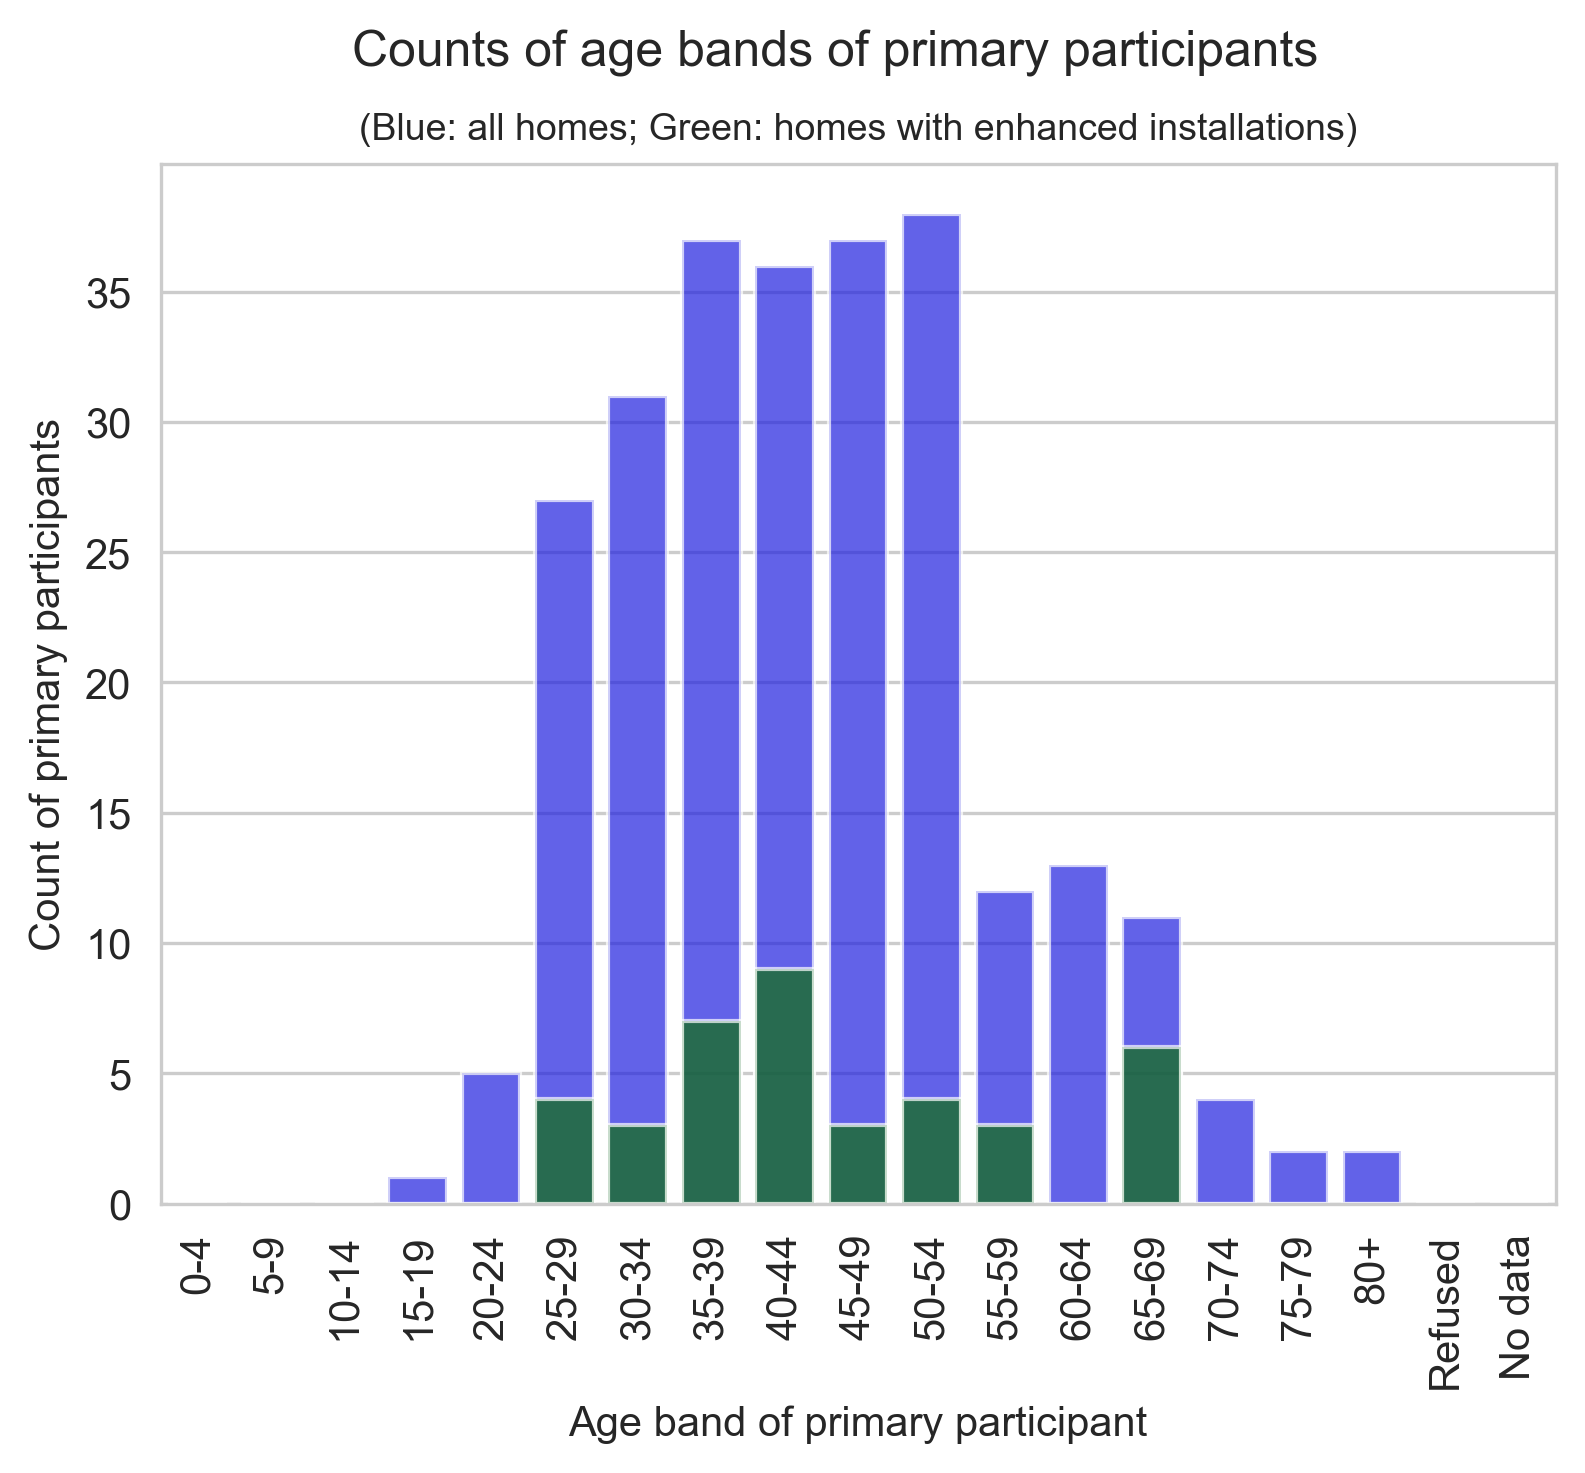

In [21]:
# Plot the data
fig = plt.figure(figsize = (6,4.5),dpi=300) 
ax = fig.add_subplot(111) 
sns.set_style('whitegrid') 
ax = sns.barplot(x=ageband_summary.index, y="count_all_pps", data=ageband_summary, color='blue',alpha=0.7)
ax = sns.barplot(x=ageband_summary.index, y="count_enhanced_pps", data=ageband_summary, color='green',alpha=0.7)
ax.set(ylabel="Count of primary participants", xlabel="Age band of primary participant")
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
fig.suptitle("Counts of age bands of primary participants", fontsize=12)
ax.set_title("(Blue: all homes; Green: homes with enhanced installations)", fontsize=9)
plt.show()

### Helping the environment
At the start of the project, how did primary participants respond to the question:

"Which of these statements best describes how you feel about your day-to-day life in the home and the environment?"

Variable: outcome_norm_env_1c_initial

This uses:
* data from survey_responses.csv and person.csv
* survey_response_wordings.csv to order the response options as they appeared in the survey

In [22]:
# Add in the primaryparticipant variable to the survey_responses table
survey_responses = pd.merge(survey_responses,person[["personid","primaryparticipant"]],on="personid",how="left")

In [23]:
# Sort data by the original order of response options
# Use survey_response_wordings to set the correct order
response_order = survey_response_wordings[survey_response_wordings.uniquequestionid=='outcome_norm_env_1c_initial'].response_wording.tolist()

# Convert to a categorical using the 
survey_responses['outcome_norm_env_1c_initial'] = pd.Categorical(survey_responses['outcome_norm_env_1c_initial'], response_order)
survey_responses.sort_values(by='outcome_norm_env_1c_initial',inplace=True)

In [24]:
# Precalculate the summary data for the plot
groupby_object_all = survey_responses[survey_responses.primaryparticipant==1].groupby(['outcome_norm_env_1c_initial'])
home_and_env_summary_all = groupby_object_all[['primaryparticipant']].count()
home_and_env_summary_all.rename(columns={"primaryparticipant": "count_all_pps"},inplace=True)

/var/folders/ch/cdbcz7115ms5zvq6n9ds4wn00000gn/T/ipykernel_80429/617457597.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  groupby_object_all = survey_responses[survey_responses.primaryparticipant==1].groupby(['outcome_norm_env_1c_initial'])


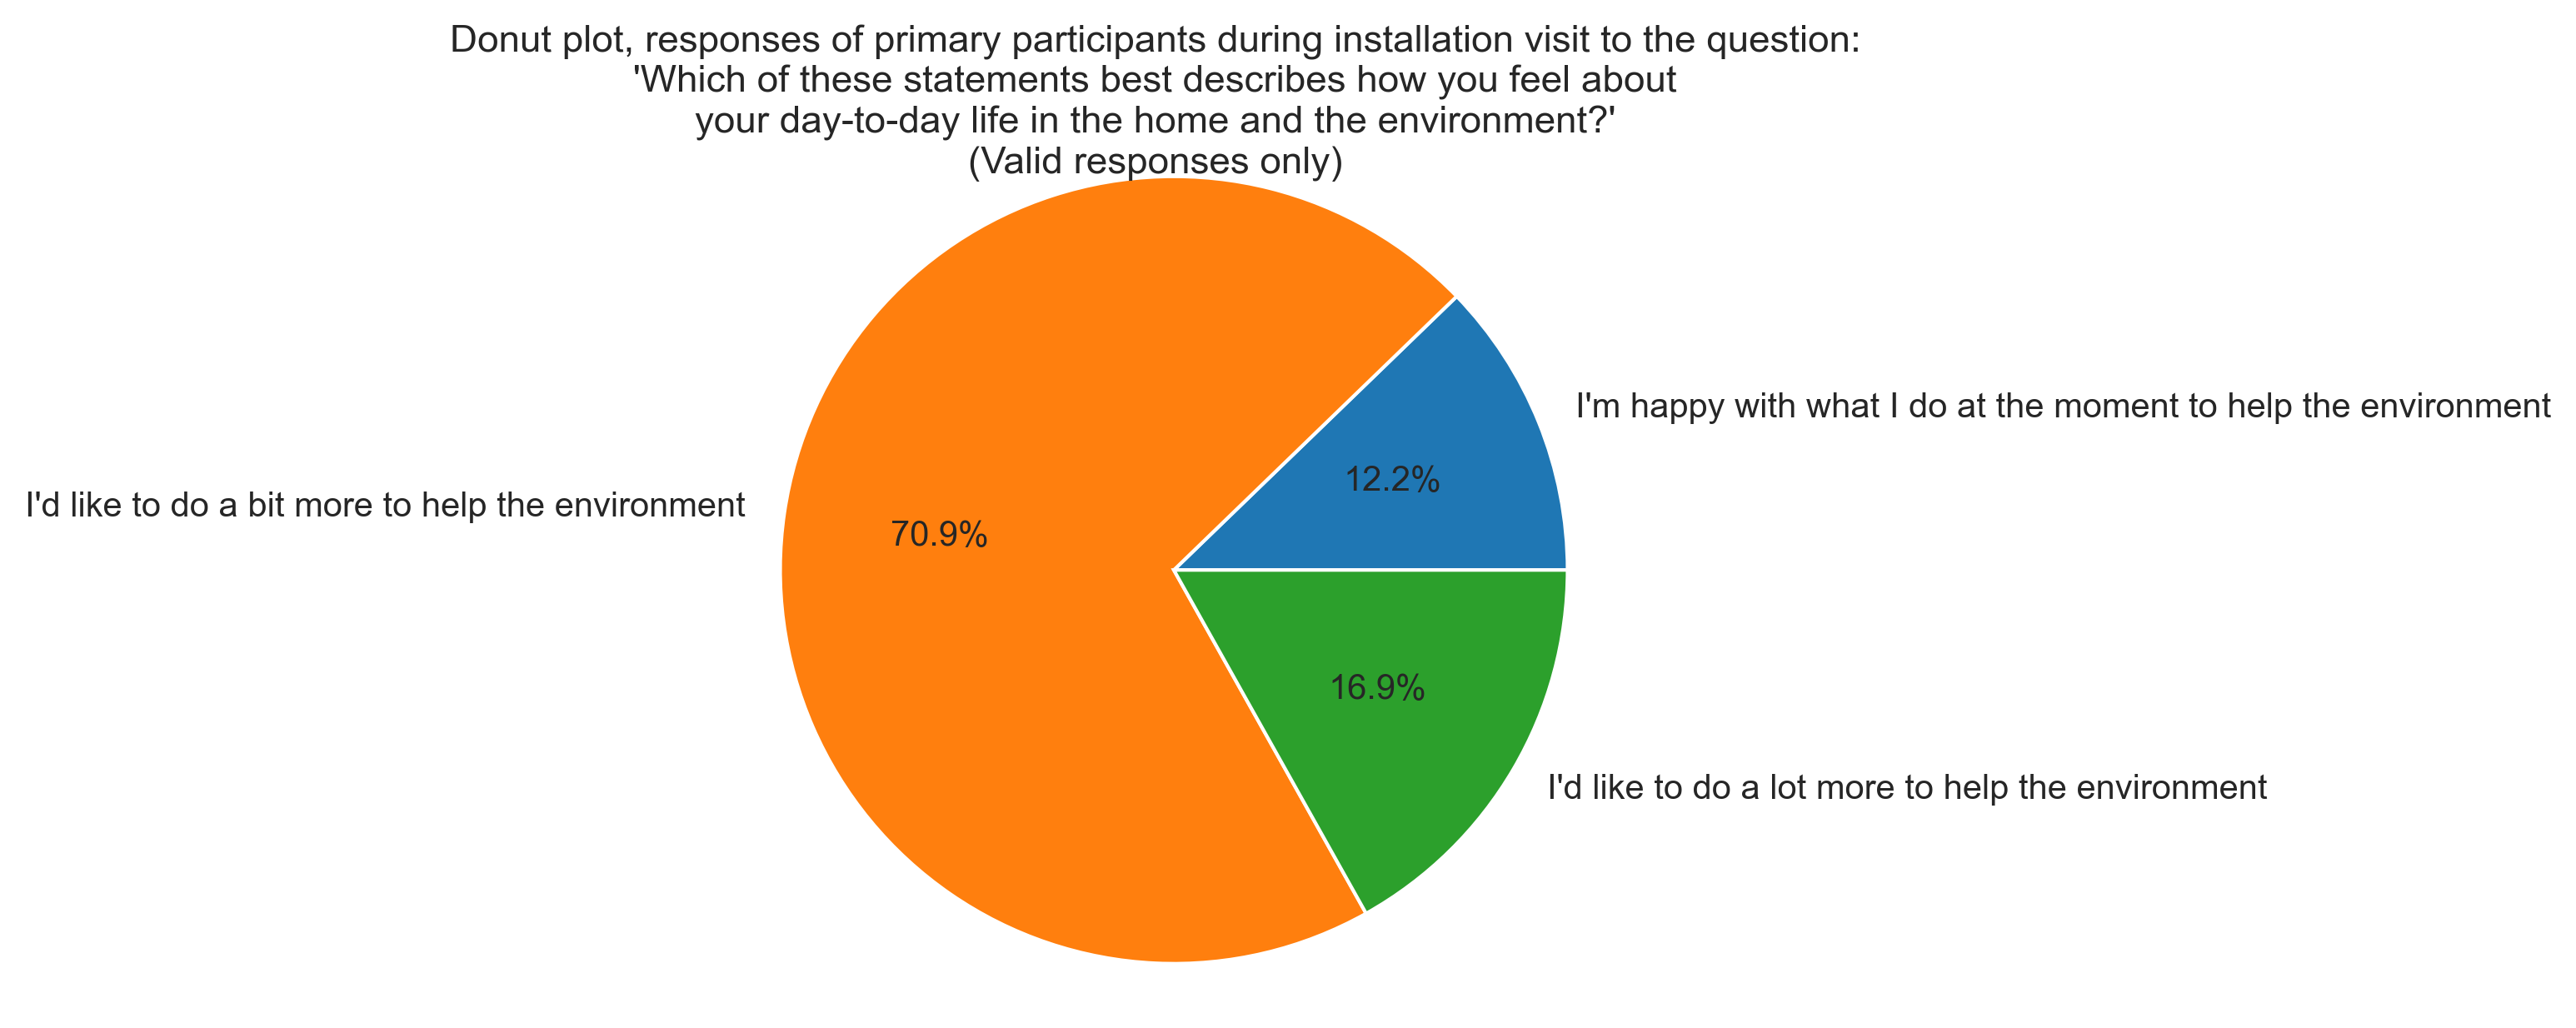

In [25]:
# Plot how primary participants responded to outcome_norm_env_1c_initial
fig = plt.figure(figsize = (6,4.5),dpi=300) 
ax = fig.add_subplot(111) 
ax.pie(home_and_env_summary_all.count_all_pps, labels=home_and_env_summary_all.index, autopct='%1.1f%%',
        shadow=False, startangle=0)
ax.axis('equal')
fig.suptitle("Donut plot, responses of primary participants during installation visit to the question:\n'Which of these statements best describes how you feel about\nyour day-to-day life in the home and the environment?'\n(Valid responses only)", fontsize=11)
plt.show()